In [1]:
# remember to load the environment first by running conda env colombia-python2 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [2]:
city_lat_long_dict = {
    'cali':{'latitude': 3.43722, 'longitude': -76.5225},
    'monteria':{'latitude': 8.74798, 'longitude': -75.88143},
    'ibague':{'latitude': 4.43889, 'longitude': -75.23222},
    'belen_de_umbria':{'latitude': 5.20087, 'longitude': -75.86865},
    'pitalito':{'latitude': 1.84966, 'longitude': -76.04785},
                     }

In [3]:
lats = [city_lat_long_dict[key]['latitude'] for key in city_lat_long_dict.keys()]
longs = [city_lat_long_dict[key]['longitude'] for key in city_lat_long_dict.keys()]
print lats   
print longs

[3.43722, 1.84966, 8.74798, 5.20087, 4.43889]
[-76.5225, -76.04785, -75.88143, -75.86865, -75.23222]


In [4]:
shapefile_path = './gadm36_COL_shp/gadm36_COL_1'

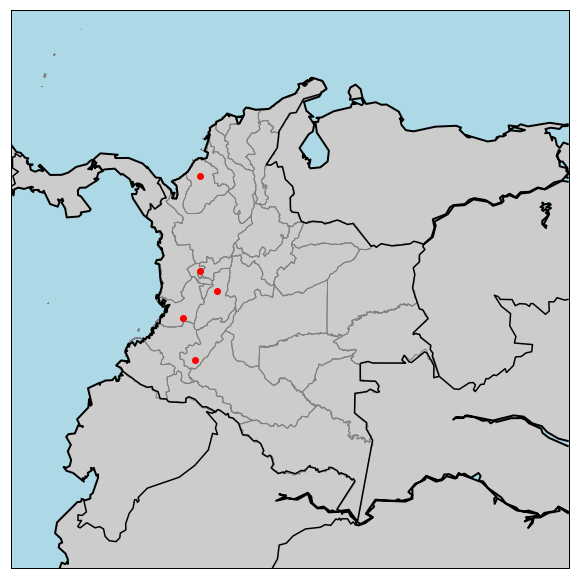

In [6]:
#fig= plt.figure(figsize=(14, 8), facecolor = 'white')
fig,ax1 = plt.subplots(figsize=(10, 13),facecolor='w')

# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# lat_ts is the latitude of true scale.
# resolution = 'c' means use crude resolution coastlines.
colombia_map = Basemap(llcrnrlat=-6,urcrnrlat=15,llcrnrlon=-83,urcrnrlon=-62,resolution='l', ax=ax1)
colombia_map.readshapefile(shapefile_path,'departments',color='grey', linewidth=1)
colombia_map.drawmapboundary(fill_color='lightblue')
colombia_map.drawcoastlines(color='black', linewidth=2)
colombia_map.drawcountries(color='black',linewidth=1.5)
colombia_map.fillcontinents()
ax1.scatter(x=longs, y=lats, c='red', alpha=1, zorder=10, marker='o')


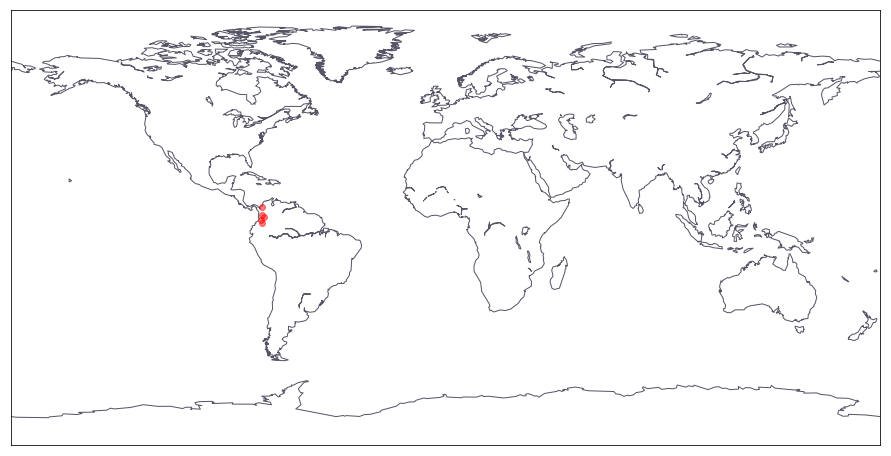

In [86]:
fig, ax = plt.subplots(figsize=(18,8))
earth = Basemap(ax=ax)
earth.drawcoastlines(color='#555566', linewidth=1)
ax.scatter(longs, lats, c='red',alpha=0.5, zorder=10)

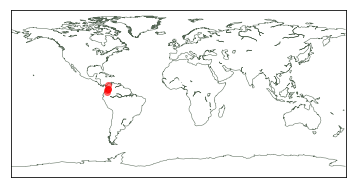

In [74]:
fig, ax = plt.subplots()
earth = Basemap(ax=ax)
earth.drawcoastlines(color='#556655', linewidth=0.5)
ax.scatter(longs, lats, 
           c='red', alpha=0.5, zorder=10)